In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

# Accessing API data

link to landslide data: https://data.nasa.gov/Earth-Science/Global-Landslide-Catalog-Export/dd9e-wu2v

request a nasa api key here: https://api.nasa.gov/index.html#signUp

In [2]:
# save your personal api key in a text file and read it in, I saved mine as nasa_key
with open('nasa_apikey.txt', 'r') as file:
    nasa_key = file.read()

In [3]:
# initialize the payload
payload = {}

# save the apikey as a header to use in request.get()
headers= {
  "apikey": nasa_key
}

In [4]:
# url for accessing the data - this is usually found in the API documentation
nasa_url = 'https://data.nasa.gov/resource/dd9e-wu2v.json'

In [5]:
# request to pull the data with your API
r = requests.get(nasa_url, headers=headers, data = payload)

In [6]:
# this will return True if your request is successful
r.ok

True

In [7]:
# read the data and turn it into a data frame
landslide = r.json()
landslide_df = pd.DataFrame(landslide)

In [8]:
landslide_df.shape

(1000, 30)

### Data cleaning

In [9]:
# select desired columns
landslide_df = landslide_df[['event_date', 'landslide_category', 'landslide_trigger', 
'landslide_size', 'fatality_count', 'injury_count', 'country_name', 'longitude', 'latitude']]

In [10]:
landslide_df.isnull().sum()

event_date              0
landslide_category      0
landslide_trigger       1
landslide_size          3
fatality_count        110
injury_count          672
country_name          148
longitude               0
latitude                0
dtype: int64

In [11]:
landslide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   event_date          1000 non-null   object
 1   landslide_category  1000 non-null   object
 2   landslide_trigger   999 non-null    object
 3   landslide_size      997 non-null    object
 4   fatality_count      890 non-null    object
 5   injury_count        328 non-null    object
 6   country_name        852 non-null    object
 7   longitude           1000 non-null   object
 8   latitude            1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [12]:
# changing numeric variables to type float instead of type object
landslide_df['fatality_count'] = landslide_df['fatality_count'].astype(float)
landslide_df['injury_count'] = landslide_df['injury_count'].astype(float)
landslide_df['longitude'] = landslide_df['longitude'].astype(float)
landslide_df['latitude'] = landslide_df['latitude'].astype(float)

# simplifying event_date and changing to type datetime
landslide_df['event_date'] = landslide_df['event_date'].str.extract(r'(\d+\-\d+\-\d+)')
landslide_df['event_date'] = pd.to_datetime(landslide_df['event_date'])

In [13]:
# fill NA variables
landslide_df['landslide_size'] = landslide_df['landslide_size'].fillna('unknown')
landslide_df['landslide_trigger'] = landslide_df['landslide_trigger'].fillna('unknown')
landslide_df['country_name'] = landslide_df['country_name'].fillna('other/unknown')
landslide_df['fatality_count'] = landslide_df['fatality_count'].fillna(0)
landslide_df['injury_count'] = landslide_df['injury_count'].fillna(0)

In [14]:
landslide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_date          1000 non-null   datetime64[ns]
 1   landslide_category  1000 non-null   object        
 2   landslide_trigger   1000 non-null   object        
 3   landslide_size      1000 non-null   object        
 4   fatality_count      1000 non-null   float64       
 5   injury_count        1000 non-null   float64       
 6   country_name        1000 non-null   object        
 7   longitude           1000 non-null   float64       
 8   latitude            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 70.4+ KB


In [15]:
landslide_df.head()

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
0,2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
1,2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2,2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
3,2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
4,2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


In [16]:
landslide_df.shape

(1000, 9)

### Exporting the data

In [17]:
landslide_df.to_csv("landslide", index = False)

In [18]:
from pandas import read_csv

csv = read_csv('landslide')

In [19]:
# Note: you will have to change the variable types again if you read it in from a csv
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_date          1000 non-null   object 
 1   landslide_category  1000 non-null   object 
 2   landslide_trigger   1000 non-null   object 
 3   landslide_size      1000 non-null   object 
 4   fatality_count      1000 non-null   float64
 5   injury_count        1000 non-null   float64
 6   country_name        1000 non-null   object 
 7   longitude           1000 non-null   float64
 8   latitude            1000 non-null   float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


----------------------------------
# Exploratory Data Analysis

In [20]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Map of Landslides

In [21]:
#plt.figure(figsize = (20, 8))
px.scatter_geo(landslide_df, lat = 'latitude', lon = 'longitude', hover_name = 'country_name')

In [22]:
fig = px.scatter_mapbox(landslide_df, lat = 'latitude', lon = 'longitude')
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {'r':200, 't':0, 'l':200, 'b':0})
fig.show()
#fig.write_html('landslide_map.html', full_html = False, include_plotlyjs = 'cdn')

### Comparing Landslide Triggers and Size

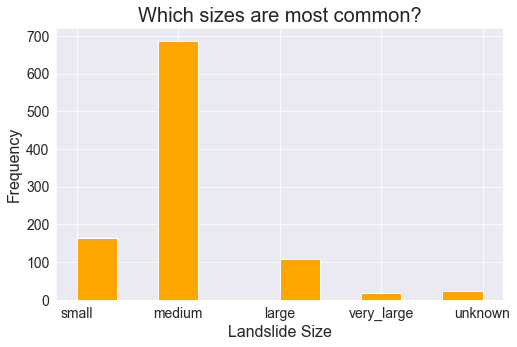

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 5))
plt.hist(data = landslide_df, x = 'landslide_size', color = 'orange')
plt.xlabel('Landslide Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Which sizes are most common?', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

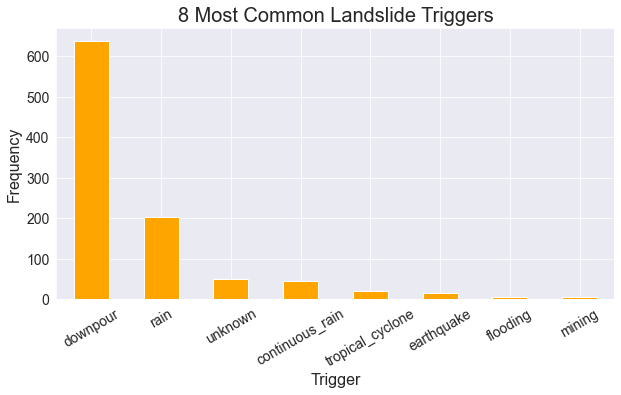

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
landslide_df.groupby('landslide_trigger')['landslide_trigger'].count().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'orange', fontsize = 14)
plt.title('8 Most Common Landslide Triggers', fontsize = 20)
plt.xlabel('Trigger', fontsize = 16)
plt.ylabel('Frequency',  fontsize = 16)
plt.xticks(rotation = 30)
plt.show()

Me trying to make a heatmap with categorical variables...

In [26]:
#sns.heatmap(landslide_df, x = 'landslide_trigger', y = 'landslide_size')

In [27]:
test = pd.DataFrame(landslide_df.groupby('landslide_trigger')['landslide_trigger'].count().sort_values(ascending = False))
test.rename(columns = {'landslide_trigger':'trigger_total_count'}, inplace = True)
test = test.reset_index()
test

,landslide_trigger,trigger_total_count
0,downpour,638
1,rain,203
2,unknown,50
3,continuous_rain,45
4,tropical_cyclone,21
5,earthquake,16
6,flooding,6
7,mining,6
8,monsoon,5
9,no_apparent_trigger,3


In [28]:
test_df = pd.merge(landslide_df, test, on = 'landslide_trigger')
test_df = test_df[test_df['trigger_total_count'] > 6]
test_df.head(2)
test_df = test_df[['landslide_size', 'landslide_trigger', 'trigger_total_count']]

but I don't think the heatmap ended up being very insightful

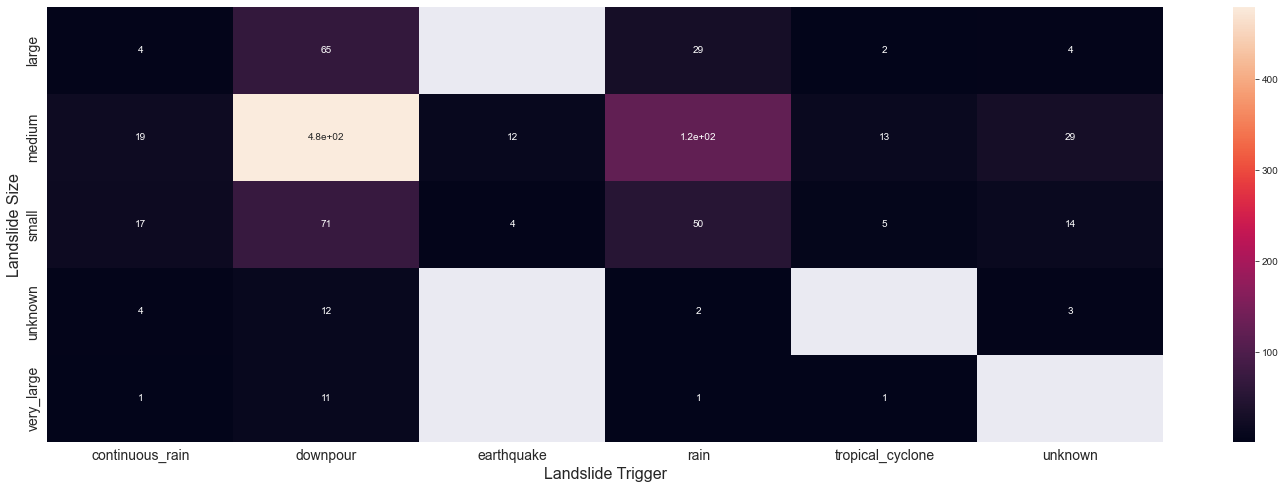

In [29]:
plt.figure(figsize = (25, 8))
df_heatmap = test_df.pivot_table(values = 'trigger_total_count', index='landslide_size', columns='landslide_trigger', aggfunc = 'count')
df_heatmap
sns.heatmap(df_heatmap,annot=True)
plt.xlabel('Landslide Trigger', fontsize = 16)
plt.ylabel('Landslide Size', fontsize = 16)
#plt.title('Which sizes are most common?', fontsize = 20)
plt.tick_params(labelsize = 14)
#plt.show()

### Landslide fatalities and injuries

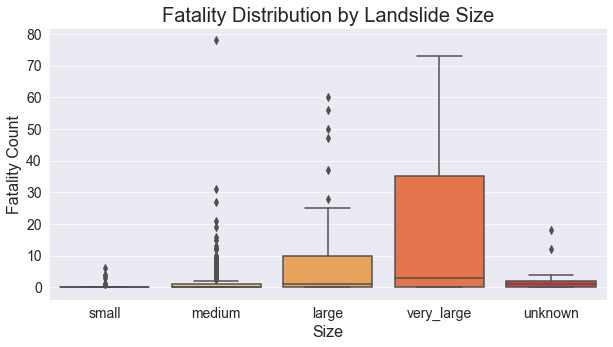

In [30]:
sns.set_style('darkgrid')
sns.set_palette('YlOrRd')
plt.figure(figsize = (10, 5))
sns.boxplot(data = landslide_df[landslide_df['fatality_count'] < 100], x = 'landslide_size', y = 'fatality_count')
plt.title('Fatality Distribution by Landslide Size', fontsize = 20)
plt.xlabel('Size', fontsize = 16)
plt.ylabel('Fatality Count', fontsize = 16)
plt.tick_params(labelsize = 14)
plt.show()

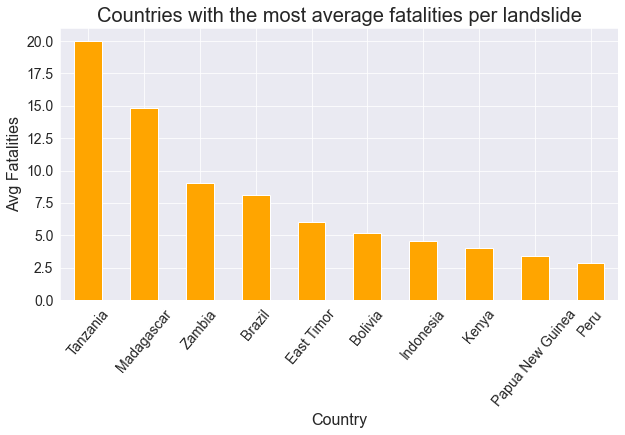

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
landslide_df.groupby('country_name')['fatality_count'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange', fontsize = 12)
plt.title('Countries with the most average fatalities per landslide', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Avg Fatalities', fontsize = 16)
plt.xticks(rotation = 50)
plt.tick_params(labelsize = 14)
plt.show()

Plots for the Narrative Post

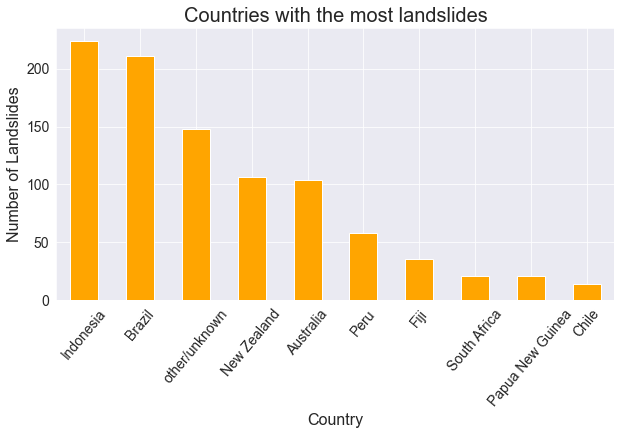

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
landslide_df.groupby('country_name')['country_name'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange', fontsize = 12)
plt.title('Countries with the most landslides', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Number of Landslides', fontsize = 16)
plt.xticks(rotation = 50)
plt.tick_params(labelsize = 14)
plt.show()

In [47]:
prac = landslide_df.groupby('country_name')['country_name'].count().sort_values(ascending = False).head(10)
pracdf = pd.DataFrame(prac)
pracdf.rename(columns = {'country_name':'count'}, inplace = True)
pracdf = pracdf.reset_index()
top10 = pracdf['country_name']

In [48]:
top10df = landslide_df[landslide_df['country_name'].isin(top10)]
top10df['count'] = 1

C:\Users\katel\AppData\Local\Temp\ipykernel_20056\3671532441.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
fig = px.bar(top10df, x = "country_name", y = "count", color= "landslide_trigger", title = "Countries with the most landslides", 
    labels={"count": "Count",
            "country_name": "Country",
            "landslide_trigger": "Landslide Trigger"},
    width=1000, height=550)
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

import plotly.io as pio

pio.write_html(fig, file='country_landslides.html', auto_open = True)

### Time

In [36]:
landslide_df = landslide_df.set_index('event_date')

In [37]:
landslide_df.head()

,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
event_date,,,,,,,,
2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


In [38]:
# create a month variable
landslide_df['month'] = landslide_df.index.month

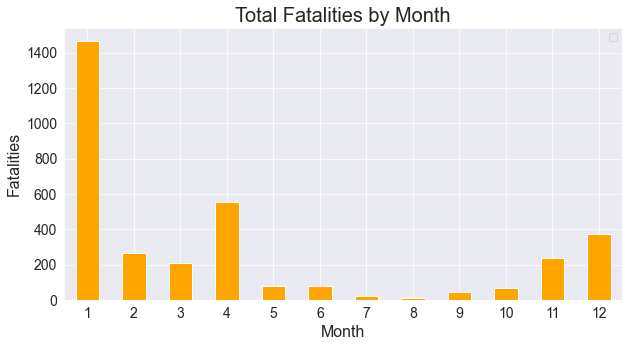

In [39]:
sns.set_style('darkgrid')
landslide_df.groupby('month').sum().reset_index().plot(kind = 'bar', x = 'month', y = 'fatality_count', color = 'orange', figsize = (10, 5), fontsize = 12)
plt.legend('')
plt.title('Total Fatalities by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Fatalities', fontsize = 16)
plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.show()

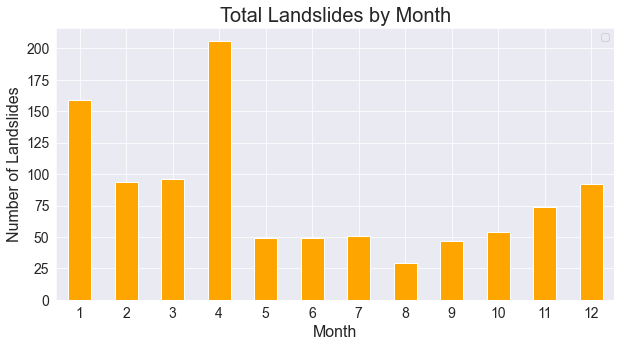

In [40]:
sns.set_style('darkgrid')
landslide_df.groupby('month').count().reset_index().plot(kind = 'bar', x = 'month', y = 'fatality_count', color = 'orange', figsize = (10, 5), fontsize = 12)
plt.legend('')
plt.title('Total Landslides by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Landslides', fontsize = 16)
plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.show()

### Not everything in an EDA is useful...

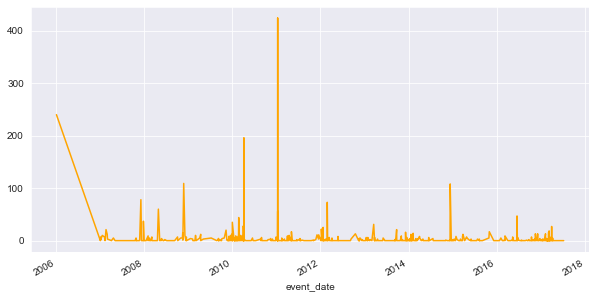

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
landslide_df['fatality_count'].plot(color = 'orange')
plt.show()

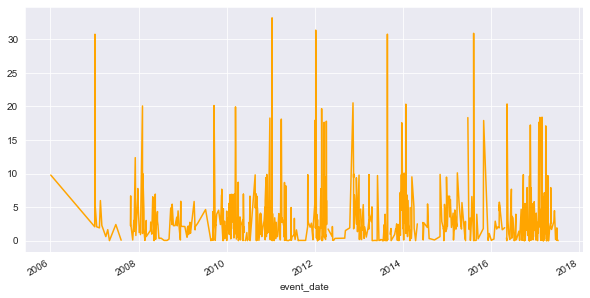

In [42]:
#aqi['Utah'].rolling(30).mean().plot()
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
landslide_df['fatality_count'].rolling(30).mean().plot(color = 'orange')
plt.show()

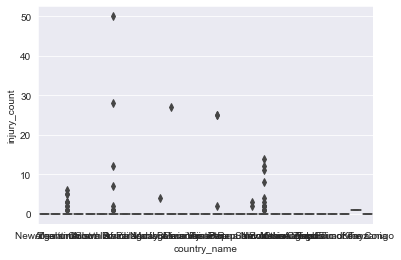

In [43]:
# also not very useful
sns.boxplot(data = landslide_df[landslide_df['injury_count'] < 100], x = 'country_name', y = 'injury_count')
plt.show()

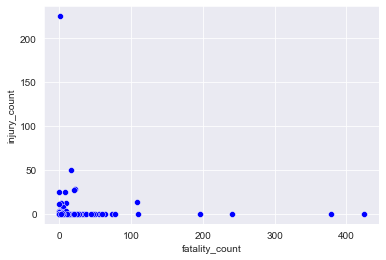

In [44]:
sns.scatterplot(data = landslide_df, x = 'fatality_count', y = 'injury_count', color = 'blue')
plt.show()

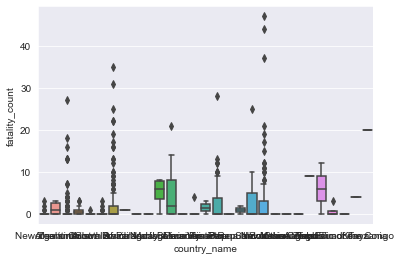

In [45]:
# not very useful
sns.boxplot(data = landslide_df[landslide_df['fatality_count'] < 50], x = 'country_name', y = 'fatality_count')
plt.show()

In [46]:
# not very useful
# sns.pairplot(landslide_df)